<a href="https://colab.research.google.com/github/Danusyasundaravel/Text-embedding/blob/main/TEXT%26WORD_EMBEDDING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
documents = [
    "Machine learning is a method of data analysis that automates analytical model building. It is a branch of artificial intelligence based on the idea that systems can learn from data, identify patterns, and make decisions with minimal human intervention.",
    "The solar system consists of the Sun and the objects that orbit it, including eight planets and their moons, as well as asteroids, comets, and meteoroids.",
    "Cooking is both an art and a science that involves preparing food for consumption by using heat. Techniques and ingredients vary widely across the world, reflecting unique cultural traditions.",
    "Classical music is a broad term that usually refers to music produced in, or rooted in the traditions of Western liturgical and secular music, encompassing a broad period from roughly the 11th century to present times.",
    "The stock market refers to the collection of markets and exchanges where the issuing and trading of equities, bonds, and other sorts of securities take place, either through formal exchanges or over-the-counter markets.",
    "Photography is the art, application, and practice of creating durable images by recording light or other electromagnetic radiation, either electronically by means of an image sensor, or chemically by means of a light-sensitive material such as photographic film.",
    "Basketball is a team sport in which two teams, most commonly of five players each, opposing one another on a rectangular court, compete with the primary objective of shooting a basketball through the defender's hoop.",
    "Meditation is a practice where an individual uses a technique – such as mindfulness, or focusing the mind on a particular object, thought, or activity – to train attention and awareness, and achieve a mentally clear and emotionally calm and stable state.",
    "Traveling is the movement of people between distant geographical locations. Travel can be done by foot, bicycle, automobile, train, boat, bus, airplane, ship, or other means, with or without luggage, and can be one way or round trip.",
    "Gardening is the practice of growing and cultivating plants as part of horticulture. In gardens, ornamental plants are often grown for their flowers, foliage, or overall appearance; useful plants, such as root vegetables, leaf vegetables, fruits, and herbs, are grown for consumption, for use as dyes, or for medicinal or cosmetic use.",
    "Artificial intelligence (AI) refers to the simulation of human intelligence in machines that are programmed to think and act like humans. The term may also be applied to any machine that exhibits traits associated with a human mind such as learning and problem-solving.",
    "The universe is all of space and time and their contents, including planets, stars, galaxies, and all other forms of matter and energy. The Big Bang theory is the prevailing cosmological description of the development of the universe.",
    "Baking is a method of preparing food that uses dry heat, normally in an oven, but can also be done in hot ashes, or on hot stones. The most common baked item is bread but many other types of foods are baked.",
    "Jazz is a music genre that originated in the African-American communities of New Orleans, United States, in the late 19th and early 20th centuries, with its roots in blues and ragtime.",
    "Economics is the social science that studies the production, distribution, and consumption of goods and services. It focuses on the behavior and interactions of economic agents and how economies work.",
    "Painting is the practice of applying paint, pigment, color or other medium to a solid surface (called the 'matrix' or 'support'). The medium is commonly applied to the base with a brush, but other implements, such as knives, sponges, and airbrushes, can be used.",
    "Soccer, known as football outside the United States and Canada, is a team sport played with a spherical ball between two teams of 11 players. It is the world's most popular sport.",
    "Yoga is a group of physical, mental, and spiritual practices or disciplines which originated in ancient India. Yoga is one of the six Āstika schools of Indian philosophical traditions.",
    "Mountaineering, or mountain climbing, is the sport of climbing mountains. It is a challenging activity that combines hiking, rock climbing, and ice climbing.",
    "Botany, also called plant science, plant biology or phytology, is the science of plant life and a branch of biology. A botanist, plant scientist or phytologist is a scientist who specializes in this field."
]


TEXT PREPROCESSING

In [ ]:

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def preprocess(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    tokens = text.split()  # Tokenization
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words] #stopwords removal
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
sentence = [preprocess(sentence) for sentence in documents]

In [ ]:
print(sentence[:2])

['machine learning method data analysis automates analytical model building branch artificial intelligence based idea systems learn data identify patterns make decisions minimal human intervention', 'solar system consists sun objects orbit including eight planets moons well asteroids comets meteoroids']


SIMILARITY MEASURES

**COSINE SIMILARITY**

In [ ]:
from math import sqrt, pow, exp
import numpy as np

def cos_similarity(x,y):
  similarity_matrix = np.dot(x, y.T)
  # Magnitudes of vectors in x and y
  x_magnitudes = np.sqrt(np.sum(x ** 2, axis=1, keepdims=True))
  y_magnitudes = np.sqrt(np.sum(y ** 2, axis=1, keepdims=True))
  cosine_sim_matrix = similarity_matrix / (x_magnitudes * y_magnitudes.T)

  return np.round(cosine_sim_matrix, 3)

**EUCLEDIAN DISTANCE**

In [ ]:
def euclidean_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

def compute_pairwise_distances(vectors):
    num_vectors = len(vectors)
    distances = np.zeros((num_vectors, num_vectors))
    for i in range(num_vectors):
        for j in range(num_vectors):
            distances[i, j] = euclidean_distance(vectors[i], vectors[j])
    return distances

def distance_to_similarity(distances):
  return 1/np.exp(distances)




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
labels = [headline[:20] for headline in sentence]
def create_heatmap(similarity, cmap = "YlGnBu"):
  df = pd.DataFrame(similarity)
  df.columns = labels
  df.index = labels
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(df, cmap=cmap)

TEXT EMBEDDING

**TF-IDF VECTORIZATION**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentence)

embedding_array = tfidf_matrix.toarray()

feature_names = vectorizer.get_feature_names_out()

embedding_array[0:20], feature_names[0:20]

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.24269233, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.45845855,
         0.22922928],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array(['achieve', 'across', 'act', 'activity', 'africanamerican',
        'agents', 'ai', 'airbrushes', 'airplane', 'also', 'analysis',
        'analytical', 'ancient', 'another', 'appearance', 'application',
        'applied', 'applying', 'art', 'artificial'], dtype=object))

Cosine Similarity (TF-IDF):
[[1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.219 0.
  0.031 0.    0.    0.    0.    0.    0.    0.026]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.093
  0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.03  0.    0.04  0.    0.    0.    0.024 0.    0.
  0.112 0.    0.078 0.    0.    0.035 0.    0.051]
 [0.    0.    0.03  1.    0.026 0.    0.    0.    0.    0.    0.054 0.
  0.    0.175 0.    0.    0.    0.028 0.    0.   ]
 [0.    0.    0.    0.026 1.    0.035 0.    0.    0.    0.    0.027 0.
  0.    0.    0.    0.    0.    0.    0.    0.   ]]


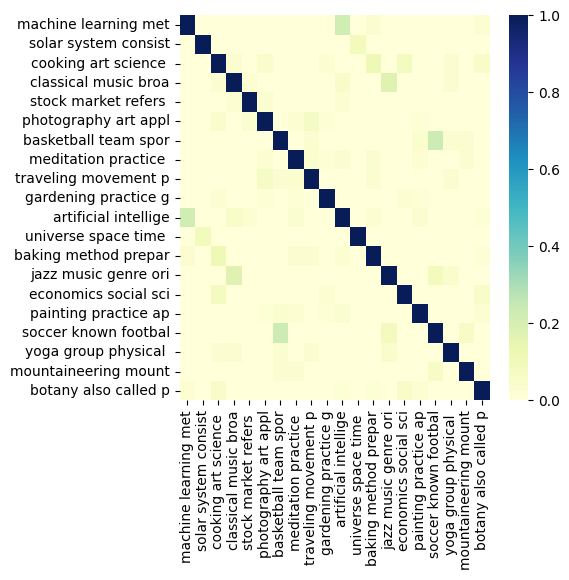

In [ ]:
#  cosine similarity
cosine_sim_tfidf = cos_similarity(embedding_array, embedding_array)

print("Cosine Similarity (TF-IDF):")
print(cosine_sim_tfidf[:5])
create_heatmap(cosine_sim_tfidf)

Euclidean Distance (Bag of Words):
 [[1.         0.24311673 0.24311673 0.24311673 0.24311673 0.24311673
  0.24311673 0.24311673 0.24311673 0.24311673 0.28647537 0.24311673
  0.24856806 0.24311673 0.24311673 0.24311673 0.24311673 0.24311673
  0.24311673 0.24768935]
 [0.24311673 1.         0.24311673 0.24311673 0.24311673 0.24311673
  0.24311673 0.24311673 0.24311673 0.24311673 0.24311673 0.25998802
  0.24311673 0.24311673 0.24311673 0.24311673 0.24311673 0.24311673
  0.24311673 0.24311673]
 [0.24311673 0.24311673 1.         0.24828311 0.24311673 0.25013304
  0.24311673 0.24311673 0.24311673 0.24721757 0.24311673 0.24311673
  0.26375722 0.24311673 0.25722343 0.24311673 0.24311673 0.24926353
  0.24311673 0.25218408]
 [0.24311673 0.24311673 0.24828311 1.         0.24760386 0.24311673
  0.24311673 0.24311673 0.24311673 0.24311673 0.25273476 0.24311673
  0.24311673 0.27681624 0.24311673 0.24311673 0.24311673 0.24799159
  0.24311673 0.24311673]
 [0.24311673 0.24311673 0.24311673 0.24760386 1.

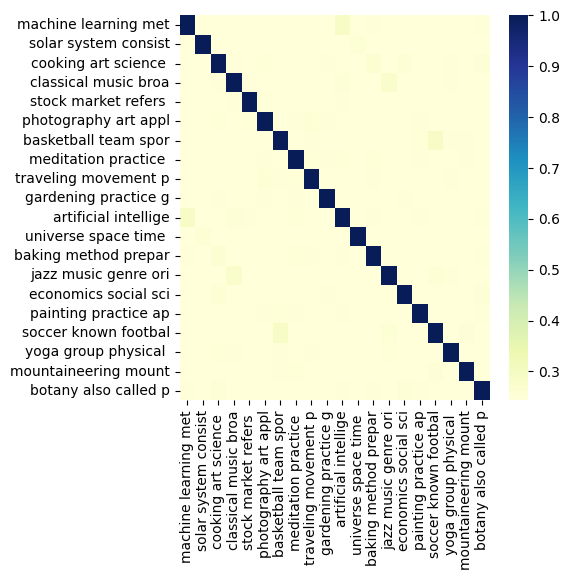

In [ ]:
# Euclidean distance
euclidean_dist_tfidf= compute_pairwise_distances(embedding_array)
dist_tfidf=distance_to_similarity(euclidean_dist_tfidf)
print("Euclidean Distance (Bag of Words):\n", dist_tfidf[:5])
create_heatmap(dist_tfidf)

**BAG OF WORDS**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()

bow_matrix = count_vectorizer.fit_transform(sentence)

bow_array = bow_matrix.toarray()

bow_feature_names = count_vectorizer.get_feature_names_out()

bow_array[:20], bow_feature_names[:10]

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 2, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array(['achieve', 'across', 'act', 'activity', 'africanamerican',
        'agents', 'ai', 'airbrushes', 'airplane', 'also'], dtype=object))

Cosine Similarity (BOW):
[[1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.255 0.
  0.038 0.    0.    0.    0.    0.    0.    0.032]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.117
  0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.042 0.    0.047 0.    0.    0.    0.035 0.    0.
  0.132 0.    0.115 0.    0.    0.051 0.    0.074]
 [0.    0.    0.042 1.    0.038 0.    0.    0.    0.    0.    0.068 0.
  0.    0.204 0.    0.    0.    0.041 0.    0.   ]
 [0.    0.    0.    0.038 1.    0.043 0.    0.    0.    0.    0.039 0.
  0.    0.    0.    0.    0.    0.    0.    0.   ]]


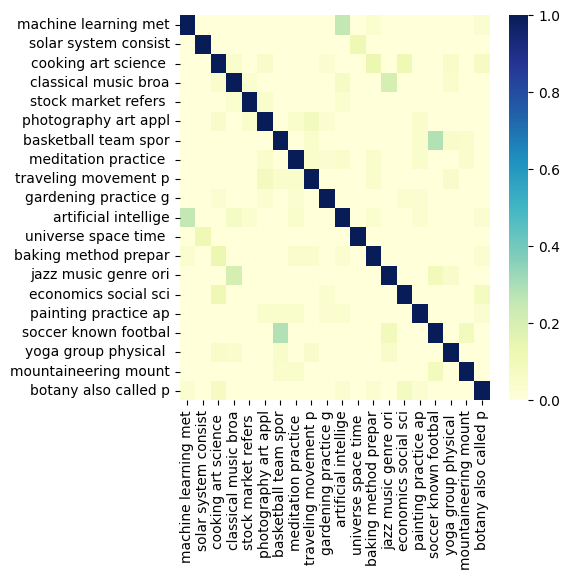

In [ ]:
# cosine similarity
cosine_sim_bow = cos_similarity(bow_array, bow_array)

print("Cosine Similarity (BOW):")
print(cosine_sim_bow[:5])
create_heatmap(cosine_sim_bow)

Euclidean Distance (Bag of Words):
 [[1.00000000e+00 1.79176283e-03 1.22085489e-03 5.62390127e-04
  9.11881966e-04 8.49325705e-04 9.79759690e-04 9.79759690e-04
  9.11881966e-04 2.46876126e-04 1.65637427e-03 1.05348180e-03
  7.91620515e-04 1.13363048e-03 1.53267501e-03 8.49325705e-04
  1.13363048e-03 1.13363048e-03 7.38342646e-04 3.80506281e-04]
 [1.79176283e-03 1.00000000e+00 3.20013384e-03 1.31588007e-03
  2.28186422e-03 2.10295033e-03 2.47875218e-03 2.47875218e-03
  2.28186422e-03 5.26197240e-04 1.41951712e-03 3.81900881e-03
  1.65637427e-03 2.93528157e-03 4.18091325e-03 2.10295033e-03
  2.93528157e-03 2.93528157e-03 1.79176283e-03 7.38342646e-04]
 [1.22085489e-03 3.20013384e-03 1.00000000e+00 1.05348180e-03
  1.53267501e-03 1.65637427e-03 1.65637427e-03 1.65637427e-03
  1.53267501e-03 4.32483366e-04 9.79759690e-04 1.79176283e-03
  1.79176283e-03 1.94013446e-03 3.81900881e-03 1.41951712e-03
  1.94013446e-03 2.28186422e-03 1.22085489e-03 6.89109834e-04]]


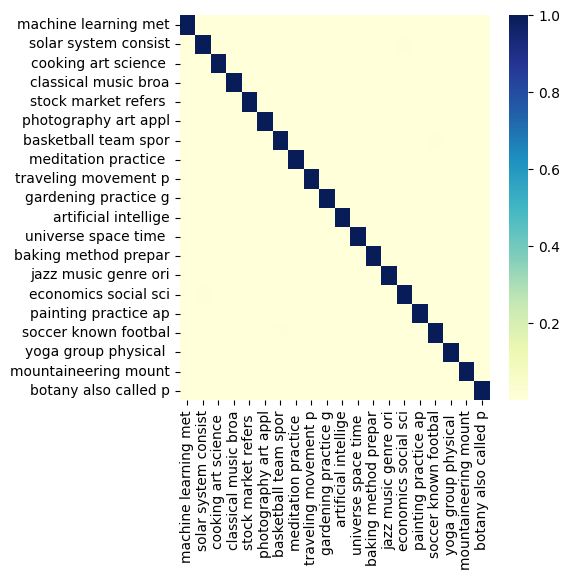

In [ ]:
# Euclidean distances
euclidean_dist_bow = compute_pairwise_distances(bow_array)
dist_bow=distance_to_similarity(euclidean_dist_bow)
print("Euclidean Distance (Bag of Words):\n", dist_bow[:3])
create_heatmap(dist_bow)

CLUSTERING

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


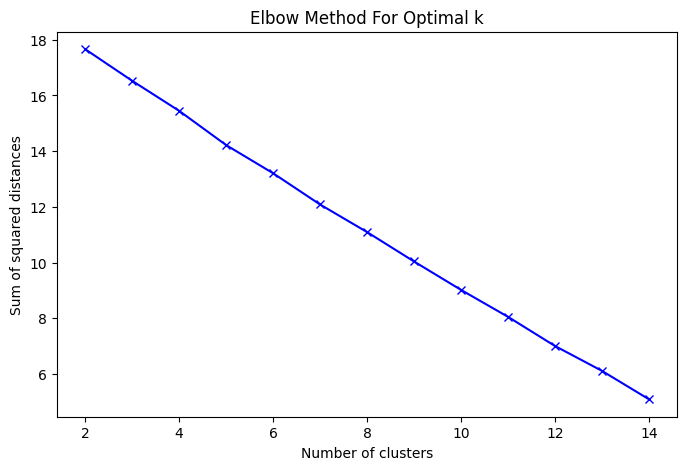

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(2, 15)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(tfidf_matrix)
    sum_of_squared_distances.append(km.inertia_)

# Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# K-Means using TFIDF vectorized data
num_clusters =2
km = KMeans(n_clusters=num_clusters, random_state=0)
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

for i, cluster in enumerate(clusters):
    print(f"Sentence {i + 1}: Cluster {cluster}")

Sentence 1: Cluster 0
Sentence 2: Cluster 0
Sentence 3: Cluster 0
Sentence 4: Cluster 1
Sentence 5: Cluster 0
Sentence 6: Cluster 0
Sentence 7: Cluster 0
Sentence 8: Cluster 0
Sentence 9: Cluster 0
Sentence 10: Cluster 0
Sentence 11: Cluster 0
Sentence 12: Cluster 0
Sentence 13: Cluster 0
Sentence 14: Cluster 1
Sentence 15: Cluster 0
Sentence 16: Cluster 0
Sentence 17: Cluster 1
Sentence 18: Cluster 1
Sentence 19: Cluster 0
Sentence 20: Cluster 0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Kmeans clustering using Bag of Words
num_clusters =2
km1 = KMeans(n_clusters=num_clusters, random_state=0)
km1.fit(bow_matrix)


KMeans(n_clusters=2, random_state=0)

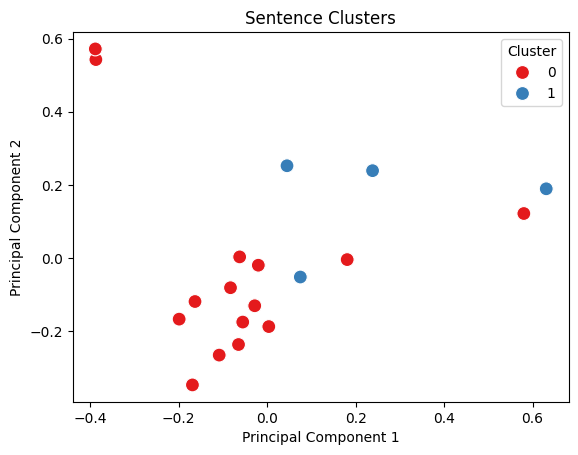

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(tfidf_matrix.toarray())

df = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
df['Cluster'] = km.labels_
df['Sentence'] = documents

sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100)


plt.title('Sentence Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
#  Silhouette Score
# Kmeans clustering using tfidf
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(tfidf_matrix.toarray(), km.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.006420236424069111


In [ ]:
# kmeans clustering for bag of words
silhouette_avg = silhouette_score(bow_matrix.toarray(), km1.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.12504373539244668


In [ ]:
import numpy as np
from scipy.spatial.distance import cdist

def dunn_index(X, labels):
    unique_labels = np.unique(labels)
    num_clusters = len(unique_labels)

    distances = cdist(X, X, 'euclidean')

    min_intercluster_distance = np.inf
    max_intracluster_distance = -np.inf

    for i in range(num_clusters):
        cluster_points = X[labels == i]

        if len(cluster_points) < 2:
            continue
        intra_dist = np.max(cdist(cluster_points, cluster_points, 'euclidean'))
        max_intracluster_distance = max(max_intracluster_distance, intra_dist)

        for j in range(num_clusters):
            if i == j:
                continue
            cluster_points_other = X[labels == j]
            inter_dist = np.min(cdist(cluster_points, cluster_points_other, 'euclidean'))
            min_intercluster_distance = min(min_intercluster_distance, inter_dist)

    if max_intracluster_distance == 0:
        return np.inf
    return min_intercluster_distance / max_intracluster_distance


# Dunn Index for tfidf clustered data
dunn_idx = dunn_index(tfidf_matrix.toarray(), km.labels_)
print(f'Dunn Index: {dunn_idx}')


Dunn Index: 0.9423797359738163


In [ ]:
# Dunn Index for tfidf clustered data
dunn_idx1 = dunn_index(bow_matrix.toarray(), km1.labels_)
print(f'Dunn Index: {dunn_idx1}')


Dunn Index: 0.787400787401181


In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 15.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


WORD EMBEDDING

In [37]:
import spacy
nlp = spacy.load('en_core_web_md')
docs = [nlp(sentences) for sentences in sentence]

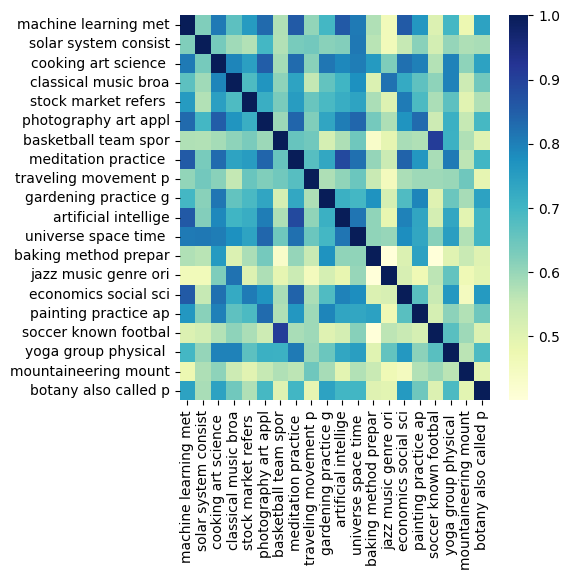

In [38]:
similarity = []
for i in range(len(docs)):
    row = []
    for j in range(len(docs)):
      row.append(docs[i].similarity(docs[j]))
    similarity.append(row)
create_heatmap(similarity)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

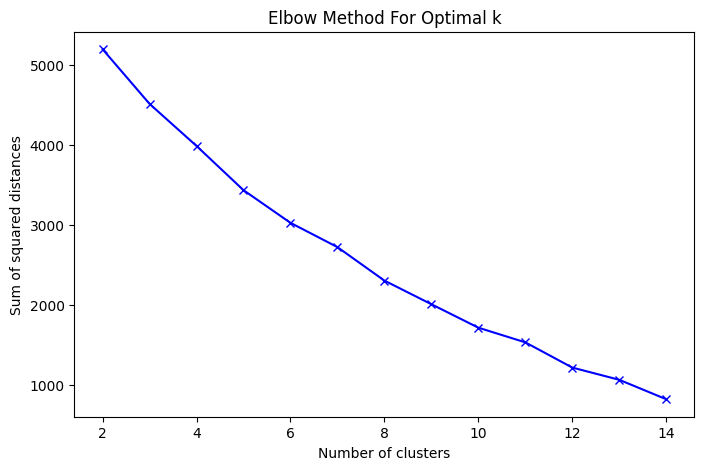

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sum_of_squared_distances = []
X = np.array([doc.vector for doc in docs])
K = range(2, 15)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

# Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
num_clusters =7
km2 = KMeans(n_clusters=num_clusters, random_state=0)
km2.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=7, random_state=0)

In [ ]:
silhouette_avg = silhouette_score(X, km2.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.14697101712226868


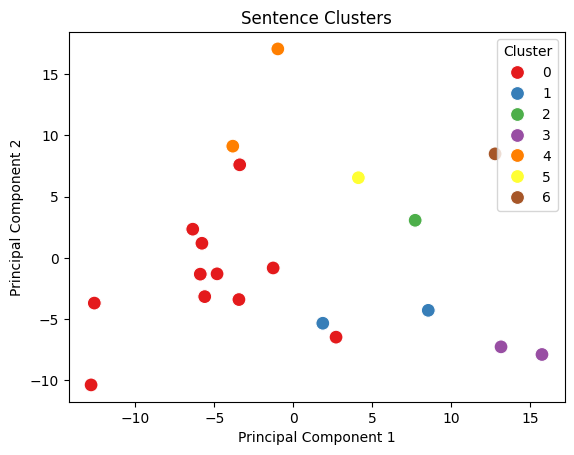

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

df = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
df['Cluster'] = km2.labels_
df['Sentence'] = documents

sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100)


plt.title('Sentence Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()